In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Exploratory Data Analysis (EDA)

In [356]:
df = pd.read_excel(r'C:\Users\user\Documents\SDGP\cricket_data.xlsx', 'batting')
df

,player,player_role,R,BF,4S,6S,SR,team_name,opp_name,teams,venue
0,Martin Guptill,BAT,63.0,38.0,5.0,2.0,165.79,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
1,Colin Munro,BAT-AR,104.0,53.0,3.0,10.0,196.23,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
2,Tom Bruce,BAT-AR,23.0,14.0,2.0,1.0,164.29,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
3,Anaru Kitchen,BAT,9.0,3.0,0.0,1.0,300.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
4,Kane Williamson,BAT,19.0,8.0,2.0,1.0,237.50,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
...,...,...,...,...,...,...,...,...,...,...,...
2331,Nurul Hasan,WK,22.0,21.0,3.0,0.0,104.76,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium
2332,Shamim Hossain,BAT-AR,NaN,NaN,NaN,NaN,NaN,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium
2333,Mustafizur Rahman,BOWL,NaN,NaN,NaN,NaN,NaN,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium
2334,Shoriful Islam,BOWL,NaN,NaN,NaN,NaN,NaN,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium


In [357]:
df.shape

(2336, 11)

In [358]:
df.columns

Index(['player', 'player_role', 'R', 'BF', '4S', '6S', 'SR', 'team_name',
       'opp_name', 'teams', 'venue'],
      dtype='object')

In [359]:
df.isnull().sum()

player           0
player_role      0
R              466
BF             466
4S             466
6S             466
SR             466
team_name        2
opp_name         2
teams            1
venue            1
dtype: int64

In [360]:
df['player'].nunique()

314

In [361]:
df['player'].unique()

array(['Martin Guptill', 'Colin Munro', 'Tom Bruce', 'Anaru Kitchen',
       'Kane Williamson', 'Glenn Phillips', 'Mitchell Santner',
       'Chadwick Walton', 'Chris Gayle', 'Andre Fletcher',
       'Rovman Powell', 'Shimron Hetmeyer', 'Carlos Brathwaite',
       'Ashley Nurse', 'Rayad Emrit', 'Jerome Taylor', 'Samuel Badree',
       'Fakhar Zaman', 'Umar Amin', 'Mohammad Nawaz', 'Haris Sohail',
       'Babar Azam', 'Sarfaraz Ahmed', 'Shadab Khan', 'Faheem Ashraf',
       'Hasan Ali', 'Mohammad Amir', 'Rumman Raees', 'Ross Taylor',
       'Ahmed Shehzad', 'Colin de Grandhomme', 'Ben Wheeler', 'Ish Sodhi',
       'Seth Rance', 'Trent Boult', 'Aamer Yamin', 'Tom Blundell',
       'Tim Southee', 'David Warner', "D'Arcy Short", 'Chris Lynn',
       'Glenn Maxwell', 'Alex Carey', 'Jason Roy', 'Alex Hales',
       'Dawid Malan', 'Eoin Morgan', 'Jos Buttler', 'Sam Billings',
       'David Willey', 'Chris Jordan', 'Adil Rashid', 'Tom Curran',
       'Mark Wood', 'Marcus Stoinis', 'Travis Head

In [362]:
df['team_name'].nunique()

9

In [363]:
df['team_name'].unique()

array(['NZ', 'WI', 'PAK', 'AUS', 'ENG', 'BAN', 'SL', 'IND', 'SA', nan],
      dtype=object)

In [364]:
df['venue'].nunique()

52

In [365]:
df['venue'].unique()

array(['Bay Oval, Mount Maunganui', 'Westpac Trust Stadium', 'Eden Park',
       'Bay Oval', 'Sydney Cricket Ground', 'Bellerive Oval',
       'Melbourne Cricket Ground', 'Westpac Stadium',
       'Shere Bangla National Stadium', 'Wanderers Stadium',
       'Sylhet Stadium', 'Seddon Park', 'SuperSport Park', 'Newlands',
       'R Premadasa Stadium', 'National Stadium (Karachi)', 'Edgbaston',
       'Old Trafford', 'Sophia Gardens', 'Warner Park',
       'Central Broward Regional Park', 'Sheikh Zayed Stadium',
       'Dubai International Cricket Stadium', 'Eden Gardens',
       'Ekana International Cricket Stadium', 'Metricon Stadium',
       'Brisbane Cricket Ground',
       'Dr YS Rajasekhara Reddy Cricket Stadium', 'M Chinnaswamy Stadium',
       'Daren Sammy National Cricket Stadium',
       'Pallekele International Cricket Stadium', 'Gaddafi Stadium',
       'Arun Jaitley Stadium', 'Manuka Oval', 'Saxton Oval',
       'Greenfield International Stadium', 'Wankhede Stadium',
       '

In [366]:
players_per_team = df.groupby(['team_name'])['player'].nunique().reset_index().rename(columns={'player': 'no. of players'})
players_per_team

,team_name,no. of players
0,AUS,32
1,BAN,29
2,ENG,30
3,IND,41
4,NZ,32
5,PAK,36
6,SA,37
7,SL,38
8,WI,40


Text(0.5, 1.0, 'Total players per team')

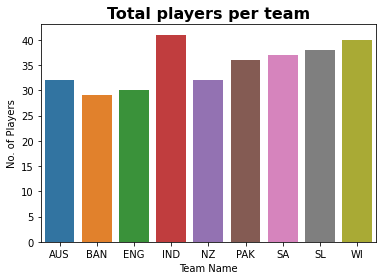

In [367]:
sns.barplot(x="team_name", y="no. of players", ci=None, data=players_per_team)
plt.xlabel('Team Name', fontsize=10)
plt.ylabel('No. of Players', fontsize=10)
plt.title("Total players per team", fontsize=16, fontweight="bold")

# Data Preprocessing

In [368]:
df = df.dropna()
df

,player,player_role,R,BF,4S,6S,SR,team_name,opp_name,teams,venue
0,Martin Guptill,BAT,63.0,38.0,5.0,2.0,165.79,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
1,Colin Munro,BAT-AR,104.0,53.0,3.0,10.0,196.23,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
2,Tom Bruce,BAT-AR,23.0,14.0,2.0,1.0,164.29,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
3,Anaru Kitchen,BAT,9.0,3.0,0.0,1.0,300.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
4,Kane Williamson,BAT,19.0,8.0,2.0,1.0,237.50,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
...,...,...,...,...,...,...,...,...,...,...,...
2327,Shakib Al Hasan,BAT-AR,26.0,17.0,4.0,0.0,152.94,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium
2328,Mahedi Hasan,BAT-AR,23.0,24.0,0.0,1.0,95.83,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium
2329,Mahmudullah,BAT-AR,0.0,4.0,0.0,0.0,0.00,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium
2330,Afif Hossain,BAT-AR,37.0,31.0,5.0,1.0,119.35,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium


In [369]:
df = df.drop(index = df[df['player_role'] == 'BOWL'].index)  #Removing Bowlers from the batting dataframe
df.head(20)

,player,player_role,R,BF,4S,6S,SR,team_name,opp_name,teams,venue
0,Martin Guptill,BAT,63.0,38.0,5.0,2.0,165.79,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
1,Colin Munro,BAT-AR,104.0,53.0,3.0,10.0,196.23,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
2,Tom Bruce,BAT-AR,23.0,14.0,2.0,1.0,164.29,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
3,Anaru Kitchen,BAT,9.0,3.0,0.0,1.0,300.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
4,Kane Williamson,BAT,19.0,8.0,2.0,1.0,237.50,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
5,Glenn Phillips,WK,7.0,4.0,0.0,1.0,175.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
6,Mitchell Santner,BOWL-AR,6.0,1.0,0.0,1.0,600.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui"
7,Chadwick Walton,WK,0.0,1.0,0.0,0.0,0.00,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
8,Chris Gayle,BAT,0.0,2.0,0.0,0.0,0.00,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
9,Andre Fletcher,WK,46.0,32.0,4.0,3.0,143.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"


In [370]:
df.shape

(1621, 11)

In [371]:
df.isnull().sum()

player         0
player_role    0
R              0
BF             0
4S             0
6S             0
SR             0
team_name      0
opp_name       0
teams          0
venue          0
dtype: int64

In [372]:
df.describe()

,R,BF,4S,6S,SR
count,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000
mean,20.888957,15.729180,1.773597,0.843307,115.823208
std,21.050733,13.218396,2.146474,1.364949,67.741277
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,0.000000,0.000000,75.000000
50%,14.000000,12.000000,1.000000,0.000000,116.670000
75%,31.000000,23.000000,3.000000,1.000000,154.170000
max,113.000000,64.000000,13.000000,10.000000,600.000000


In [373]:
r_conditions = [
    (df['R'] >= 30),
    (df['R'] >= 20) & (df['R'] < 30),
    (df['R'] >= 10) & (df['R'] < 20),
    (df['R'] > 0) & (df['R'] < 10),
    (df['R'] == 0)
]


r_values = [
    1,
    0.75,
    0.5,
    0.25,
    0
]

df['R_points'] = np.select(r_conditions, r_values)
df

,player,player_role,R,BF,4S,6S,SR,team_name,opp_name,teams,venue,R_points
0,Martin Guptill,BAT,63.0,38.0,5.0,2.0,165.79,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00
1,Colin Munro,BAT-AR,104.0,53.0,3.0,10.0,196.23,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00
2,Tom Bruce,BAT-AR,23.0,14.0,2.0,1.0,164.29,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.75
3,Anaru Kitchen,BAT,9.0,3.0,0.0,1.0,300.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.25
4,Kane Williamson,BAT,19.0,8.0,2.0,1.0,237.50,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
2327,Shakib Al Hasan,BAT-AR,26.0,17.0,4.0,0.0,152.94,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.75
2328,Mahedi Hasan,BAT-AR,23.0,24.0,0.0,1.0,95.83,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.75
2329,Mahmudullah,BAT-AR,0.0,4.0,0.0,0.0,0.00,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.00
2330,Afif Hossain,BAT-AR,37.0,31.0,5.0,1.0,119.35,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,1.00


In [374]:
fours_conditions = [
    (df['4S'] >= 10),
    (df['4S'] >= 5) & (df['4S'] < 10),
    (df['4S'] >= 2) & (df['4S'] < 5),
    (df['4S'] == 1),
    (df['4S'] == 0)
]


fours_values = [
    1,
    0.75,
    0.5,
    0.25,
    0
]

df['4S_points'] = np.select(fours_conditions, fours_values)
df

,player,player_role,R,BF,4S,6S,SR,team_name,opp_name,teams,venue,R_points,4S_points
0,Martin Guptill,BAT,63.0,38.0,5.0,2.0,165.79,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0.75
1,Colin Munro,BAT-AR,104.0,53.0,3.0,10.0,196.23,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0.50
2,Tom Bruce,BAT-AR,23.0,14.0,2.0,1.0,164.29,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.75,0.50
3,Anaru Kitchen,BAT,9.0,3.0,0.0,1.0,300.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.25,0.00
4,Kane Williamson,BAT,19.0,8.0,2.0,1.0,237.50,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,Shakib Al Hasan,BAT-AR,26.0,17.0,4.0,0.0,152.94,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.75,0.50
2328,Mahedi Hasan,BAT-AR,23.0,24.0,0.0,1.0,95.83,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.75,0.00
2329,Mahmudullah,BAT-AR,0.0,4.0,0.0,0.0,0.00,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.00,0.00
2330,Afif Hossain,BAT-AR,37.0,31.0,5.0,1.0,119.35,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,1.00,0.75


In [375]:
sixes_conditions = [
    (df['6S'] >= 6),
    (df['6S'] >= 3) & (df['6S'] < 6),
    (df['6S'] == 2),
    (df['6S'] == 1),
    (df['6S'] == 0)
]


sixes_values = [
    1,
    0.75,
    0.5,
    0.25,
    0
]

df['6S_points'] = np.select(sixes_conditions, sixes_values)
df

,player,player_role,R,BF,4S,6S,SR,team_name,opp_name,teams,venue,R_points,4S_points,6S_points
0,Martin Guptill,BAT,63.0,38.0,5.0,2.0,165.79,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0.75,0.50
1,Colin Munro,BAT-AR,104.0,53.0,3.0,10.0,196.23,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0.50,1.00
2,Tom Bruce,BAT-AR,23.0,14.0,2.0,1.0,164.29,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.75,0.50,0.25
3,Anaru Kitchen,BAT,9.0,3.0,0.0,1.0,300.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.25,0.00,0.25
4,Kane Williamson,BAT,19.0,8.0,2.0,1.0,237.50,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.50,0.50,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,Shakib Al Hasan,BAT-AR,26.0,17.0,4.0,0.0,152.94,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.75,0.50,0.00
2328,Mahedi Hasan,BAT-AR,23.0,24.0,0.0,1.0,95.83,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.75,0.00,0.25
2329,Mahmudullah,BAT-AR,0.0,4.0,0.0,0.0,0.00,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.00,0.00,0.00
2330,Afif Hossain,BAT-AR,37.0,31.0,5.0,1.0,119.35,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,1.00,0.75,0.25


In [376]:
sr_conditions = [
    (df['SR'] >= 155),
    (df['SR'] >= 115) & (df['SR'] < 155),
    (df['SR'] >= 75) & (df['SR'] < 115),
    (df['SR'] >= 1) & (df['SR'] < 75),
    (df['SR'] == 0)
]


sr_values = [
    1,
    0.75,
    0.5,
    0.25,
    0
]

df['SR_points'] = np.select(sr_conditions, sr_values)
df

,player,player_role,R,BF,4S,6S,SR,team_name,opp_name,teams,venue,R_points,4S_points,6S_points,SR_points
0,Martin Guptill,BAT,63.0,38.0,5.0,2.0,165.79,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0.75,0.50,1.00
1,Colin Munro,BAT-AR,104.0,53.0,3.0,10.0,196.23,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0.50,1.00,1.00
2,Tom Bruce,BAT-AR,23.0,14.0,2.0,1.0,164.29,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.75,0.50,0.25,1.00
3,Anaru Kitchen,BAT,9.0,3.0,0.0,1.0,300.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.25,0.00,0.25,1.00
4,Kane Williamson,BAT,19.0,8.0,2.0,1.0,237.50,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.50,0.50,0.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,Shakib Al Hasan,BAT-AR,26.0,17.0,4.0,0.0,152.94,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.75,0.50,0.00,0.75
2328,Mahedi Hasan,BAT-AR,23.0,24.0,0.0,1.0,95.83,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.75,0.00,0.25,0.50
2329,Mahmudullah,BAT-AR,0.0,4.0,0.0,0.0,0.00,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.00,0.00,0.00,0.00
2330,Afif Hossain,BAT-AR,37.0,31.0,5.0,1.0,119.35,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,1.00,0.75,0.25,0.75


In [377]:
df.isnull().sum()

player         0
player_role    0
R              0
BF             0
4S             0
6S             0
SR             0
team_name      0
opp_name       0
teams          0
venue          0
R_points       0
4S_points      0
6S_points      0
SR_points      0
dtype: int64

In [378]:
df['performance_index'] = df['R_points'] + df['4S_points'] + df['6S_points'] + df['SR_points']
df

,player,player_role,R,BF,4S,6S,SR,team_name,opp_name,teams,venue,R_points,4S_points,6S_points,SR_points,performance_index
0,Martin Guptill,BAT,63.0,38.0,5.0,2.0,165.79,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0.75,0.50,1.00,3.25
1,Colin Munro,BAT-AR,104.0,53.0,3.0,10.0,196.23,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0.50,1.00,1.00,3.50
2,Tom Bruce,BAT-AR,23.0,14.0,2.0,1.0,164.29,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.75,0.50,0.25,1.00,2.50
3,Anaru Kitchen,BAT,9.0,3.0,0.0,1.0,300.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.25,0.00,0.25,1.00,1.50
4,Kane Williamson,BAT,19.0,8.0,2.0,1.0,237.50,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.50,0.50,0.25,1.00,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,Shakib Al Hasan,BAT-AR,26.0,17.0,4.0,0.0,152.94,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.75,0.50,0.00,0.75,2.00
2328,Mahedi Hasan,BAT-AR,23.0,24.0,0.0,1.0,95.83,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.75,0.00,0.25,0.50,1.50
2329,Mahmudullah,BAT-AR,0.0,4.0,0.0,0.0,0.00,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.00,0.00,0.00,0.00,0.00
2330,Afif Hossain,BAT-AR,37.0,31.0,5.0,1.0,119.35,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,1.00,0.75,0.25,0.75,2.75


In [379]:
df.describe()

,R,BF,4S,6S,SR,R_points,4S_points,6S_points,SR_points,performance_index
count,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000
mean,20.888957,15.729180,1.773597,0.843307,115.823208,0.547656,0.290407,0.188001,0.606107,1.632171
std,21.050733,13.218396,2.146474,1.364949,67.741277,0.336335,0.269004,0.264860,0.314146,1.009788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,0.000000,0.000000,75.000000,0.250000,0.000000,0.000000,0.500000,0.750000
50%,14.000000,12.000000,1.000000,0.000000,116.670000,0.500000,0.250000,0.000000,0.750000,1.500000
75%,31.000000,23.000000,3.000000,1.000000,154.170000,1.000000,0.500000,0.250000,0.750000,2.500000
max,113.000000,64.000000,13.000000,10.000000,600.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [380]:
performance_conditions = [
    (df['performance_index'] >= 2.50),
    (df['performance_index'] >= 1.00) & (df['performance_index'] < 2.50),
    (df['performance_index'] >= 0) & (df['performance_index'] < 1.00),
]


performance_values = [
    2,
    1,
    0
]

df['performance'] = np.select(performance_conditions, performance_values)
df

,player,player_role,R,BF,4S,6S,SR,team_name,opp_name,teams,venue,R_points,4S_points,6S_points,SR_points,performance_index,performance
0,Martin Guptill,BAT,63.0,38.0,5.0,2.0,165.79,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0.75,0.50,1.00,3.25,2
1,Colin Munro,BAT-AR,104.0,53.0,3.0,10.0,196.23,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0.50,1.00,1.00,3.50,2
2,Tom Bruce,BAT-AR,23.0,14.0,2.0,1.0,164.29,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.75,0.50,0.25,1.00,2.50,2
3,Anaru Kitchen,BAT,9.0,3.0,0.0,1.0,300.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.25,0.00,0.25,1.00,1.50,1
4,Kane Williamson,BAT,19.0,8.0,2.0,1.0,237.50,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.50,0.50,0.25,1.00,2.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,Shakib Al Hasan,BAT-AR,26.0,17.0,4.0,0.0,152.94,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.75,0.50,0.00,0.75,2.00,1
2328,Mahedi Hasan,BAT-AR,23.0,24.0,0.0,1.0,95.83,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.75,0.00,0.25,0.50,1.50,1
2329,Mahmudullah,BAT-AR,0.0,4.0,0.0,0.0,0.00,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,0.00,0.00,0.00,0.00,0.00,0
2330,Afif Hossain,BAT-AR,37.0,31.0,5.0,1.0,119.35,BAN,AUS,BAN vs AUS,Shere Bangla National Stadium,1.00,0.75,0.25,0.75,2.75,2


In [381]:
df = df.filter(['player', 'player_role', 'team_name', 'opp_name', 'venue', 'performance'])
df

,player,player_role,team_name,opp_name,venue,performance
0,Martin Guptill,BAT,NZ,WI,"Bay Oval, Mount Maunganui",2
1,Colin Munro,BAT-AR,NZ,WI,"Bay Oval, Mount Maunganui",2
2,Tom Bruce,BAT-AR,NZ,WI,"Bay Oval, Mount Maunganui",2
3,Anaru Kitchen,BAT,NZ,WI,"Bay Oval, Mount Maunganui",1
4,Kane Williamson,BAT,NZ,WI,"Bay Oval, Mount Maunganui",1
...,...,...,...,...,...,...
2327,Shakib Al Hasan,BAT-AR,BAN,AUS,Shere Bangla National Stadium,1
2328,Mahedi Hasan,BAT-AR,BAN,AUS,Shere Bangla National Stadium,1
2329,Mahmudullah,BAT-AR,BAN,AUS,Shere Bangla National Stadium,0
2330,Afif Hossain,BAT-AR,BAN,AUS,Shere Bangla National Stadium,2


In [382]:
le_player = LabelEncoder()
le_opp_name = LabelEncoder()
le_venue = LabelEncoder()

In [383]:
df['player_id'] = le_player.fit_transform(df['player'])
df['opp_id'] = le_opp_name.fit_transform(df['opp_name'])
df['venue_id'] = le_venue.fit_transform(df['venue'])
df

,player,player_role,team_name,opp_name,venue,performance,player_id,opp_id,venue_id
0,Martin Guptill,BAT,NZ,WI,"Bay Oval, Mount Maunganui",2,122,8,2
1,Colin Munro,BAT-AR,NZ,WI,"Bay Oval, Mount Maunganui",2,36,8,2
2,Tom Bruce,BAT-AR,NZ,WI,"Bay Oval, Mount Maunganui",2,187,8,2
3,Anaru Kitchen,BAT,NZ,WI,"Bay Oval, Mount Maunganui",1,10,8,2
4,Kane Williamson,BAT,NZ,WI,"Bay Oval, Mount Maunganui",1,101,8,2
...,...,...,...,...,...,...,...,...,...
2327,Shakib Al Hasan,BAT-AR,BAN,AUS,Shere Bangla National Stadium,1,167,0,38
2328,Mahedi Hasan,BAT-AR,BAN,AUS,Shere Bangla National Stadium,1,116,0,38
2329,Mahmudullah,BAT-AR,BAN,AUS,Shere Bangla National Stadium,0,117,0,38
2330,Afif Hossain,BAT-AR,BAN,AUS,Shere Bangla National Stadium,2,3,0,38


In [384]:
group = df.groupby('team_name')
group

In [387]:
df_oppositionIDs = df[['opp_name', 'opp_id']]
df_oppositionIDs = df_oppositionIDs.drop_duplicates(subset='opp_name', keep='first')
df_oppositionIDs

,opp_name,opp_id
0,WI,8
7,NZ,4
28,PAK,5
66,AUS,0
92,ENG,2
130,SL,7
137,BAN,1
158,SA,6
165,IND,3


In [389]:
df_venueIDs = df[['venue', 'venue_id']]
df_venueIDs = df_venueIDs.drop_duplicates(subset='venue', keep='first')
df_venueIDs

,venue,venue_id
0,"Bay Oval, Mount Maunganui",2
17,Westpac Trust Stadium,51
33,Eden Park,13
50,Bay Oval,1
66,Sydney Cricket Ground,42
81,Bellerive Oval,3
99,Melbourne Cricket Ground,26
112,Westpac Stadium,50
130,Shere Bangla National Stadium,38
158,Wanderers Stadium,47


#### Sri Lankan Player Details

In [391]:
df_bat_sl = group.get_group('SL')
df_bat_sl = df_bat_sl[['player', 'player_role', 'player_id']]
df_bat_sl = df_bat_sl.drop_duplicates(subset='player', keep='first')
df_bat_sl 

,player,player_role,player_id
137,Kusal Mendis,BAT,106
138,Danushka Gunathilaka,BAT-AR,42
139,Upul Tharanga,BAT,191
140,Dasun Shanaka,BAT-AR,45
141,Niroshan Dickwella,WK,138
142,Thisara Perera,BOWL-AR,183
181,Dinesh Chandimal,WK,54
260,Kusal Perera,WK,107
288,Jeevan Mendis,BOWL-AR,91
332,Isuru Udana,BOWL-AR,81


#### England Player Details

In [392]:
df_bat_eng = group.get_group('ENG')
df_bat_eng = df_bat_eng[['player', 'player_role', 'player_id']]
df_bat_eng = df_bat_eng.drop_duplicates(subset='player', keep='first')
df_bat_eng

,player,player_role,player_id
81,Jason Roy,BAT,89
82,Alex Hales,BAT,8
83,Dawid Malan,BAT,49
84,Eoin Morgan,BAT,58
85,Jos Buttler,WK,97
86,Sam Billings,WK,159
87,David Willey,BOWL-AR,48
90,Tom Curran,BOWL-AR,188
102,James Vince,BAT,85
200,Liam Dawson,BOWL-AR,112


#### Australian Player Details

In [393]:
df_bat_aus = group.get_group('AUS')
df_bat_aus = df_bat_aus[['player', 'player_role', 'player_id']]
df_bat_aus = df_bat_aus.drop_duplicates(subset='player', keep='first')
df_bat_aus

,player,player_role,player_id
76,David Warner,BAT,47
77,D'Arcy Short,BAT,39
78,Chris Lynn,BAT,33
79,Glenn Maxwell,BAT-AR,68
80,Alex Carey,WK,7
96,Marcus Stoinis,BAT-AR,119
97,Travis Head,BAT-AR,189
111,Aaron Finch,BAT,0
233,Ashton Agar,BOWL-AR,17
509,Ben McDermott,WK,25


#### New-zealand Player Details

In [394]:
df_bat_nz = group.get_group('NZ')
df_bat_nz = df_bat_nz[['player', 'player_role', 'player_id']]
df_bat_nz = df_bat_nz.drop_duplicates(subset='player', keep='first')
df_bat_nz

,player,player_role,player_id
0,Martin Guptill,BAT,122
1,Colin Munro,BAT-AR,36
2,Tom Bruce,BAT-AR,187
3,Anaru Kitchen,BAT,10
4,Kane Williamson,BAT,101
5,Glenn Phillips,WK,69
6,Mitchell Santner,BOWL-AR,127
32,Ross Taylor,BAT,153
44,Colin de Grandhomme,BAT-AR,37
64,Tom Blundell,WK,186


#### South African Player Details

In [395]:
df_bat_sa = group.get_group('SA')
df_bat_sa = df_bat_sa[['player', 'player_role', 'player_id']]
df_bat_sa = df_bat_sa.drop_duplicates(subset='player', keep='first')
df_bat_sa

,player,player_role,player_id
165,JJ Smuts,BAT-AR,82
166,Reeza Hendricks,BAT,150
167,Jean-Paul Duminy,BAT-AR,90
168,David Miller,BAT,46
169,Farhaan Behardien,BAT-AR,64
170,Heinrich Klaasen,WK,74
171,Andile Phehlukwayo,BOWL-AR,11
172,Chris Morris,BOWL-AR,34
249,Christiaan Jonker,BAT,35
475,Quinton de Kock,WK,146


#### West Indies Player Details

In [396]:
df_bat_wi = group.get_group('WI')
df_bat_wi = df_bat_wi[['player', 'player_role', 'player_id']]
df_bat_wi = df_bat_wi.drop_duplicates(subset='player', keep='first')
df_bat_wi

,player,player_role,player_id
7,Chadwick Walton,WK,30
8,Chris Gayle,BAT,32
9,Andre Fletcher,WK,12
10,Rovman Powell,BAT,154
11,Shimron Hetmeyer,BAT,172
12,Carlos Brathwaite,BOWL-AR,29
14,Rayad Emrit,BOWL-AR,149
371,Marlon Samuels,BAT-AR,121
372,Jason Mohammed,BAT,88
373,Denesh Ramdin,WK,50


#### Indian Player Details

In [397]:
df_bat_ind = group.get_group('IND')
df_bat_ind = df_bat_ind[['player', 'player_role', 'player_id']]
df_bat_ind = df_bat_ind.drop_duplicates(subset='player', keep='first')
df_bat_ind

,player,player_role,player_id
158,Rohit Sharma,BAT,152
159,Shikhar Dhawan,BAT,171
160,Suresh Raina,BAT,179
161,Virat Kohli,BAT,193
162,Manish Pandey,BAT,118
163,M S Dhoni,WK,115
164,Hardik Pandya,BAT-AR,71
242,Dinesh Karthik,WK,55
243,Axar Patel,BOWL-AR,21
256,Rishabh Pant,WK,151


#### Pakistan Player Details

In [398]:
df_bat_pak = group.get_group('PAK')
df_bat_pak = df_bat_pak[['player', 'player_role', 'player_id']]
df_bat_pak = df_bat_pak.drop_duplicates(subset='player', keep='first')
df_bat_pak

,player,player_role,player_id
17,Fakhar Zaman,BAT,63
18,Umar Amin,BAT-AR,190
19,Mohammad Nawaz,BOWL-AR,132
20,Haris Sohail,BAT-AR,72
21,Babar Azam,BAT,23
22,Sarfaraz Ahmed,WK,162
23,Shadab Khan,BOWL-AR,165
24,Faheem Ashraf,BOWL-AR,62
34,Ahmed Shehzad,BAT,4
364,Hussain Talat,BAT-AR,76


#### Bangladesh Player Details

In [399]:
df_bat_ban = group.get_group('BAN')
df_bat_ban = df_bat_ban[['player', 'player_role', 'player_id']]
df_bat_ban = df_bat_ban.drop_duplicates(subset='player', keep='first')
df_bat_ban

,player,player_role,player_id
130,Zakir Hasan,WK,198
131,Soumya Sarkar,BAT,177
132,Mushfiqur Rahim,WK,136
133,Afif Hossain,BAT-AR,3
134,Mahmudullah,BAT-AR,117
135,Sabbir Rahman,BAT,156
136,Ariful Haque,BAT-AR,16
182,Tamim Iqbal,BAT,181
185,Mohammad Mithun,WK,130
188,Mohammad Saifuddin,BOWL-AR,134


In [400]:
df

,player,player_role,team_name,opp_name,venue,performance,player_id,opp_id,venue_id
0,Martin Guptill,BAT,NZ,WI,"Bay Oval, Mount Maunganui",2,122,8,2
1,Colin Munro,BAT-AR,NZ,WI,"Bay Oval, Mount Maunganui",2,36,8,2
2,Tom Bruce,BAT-AR,NZ,WI,"Bay Oval, Mount Maunganui",2,187,8,2
3,Anaru Kitchen,BAT,NZ,WI,"Bay Oval, Mount Maunganui",1,10,8,2
4,Kane Williamson,BAT,NZ,WI,"Bay Oval, Mount Maunganui",1,101,8,2
...,...,...,...,...,...,...,...,...,...
2327,Shakib Al Hasan,BAT-AR,BAN,AUS,Shere Bangla National Stadium,1,167,0,38
2328,Mahedi Hasan,BAT-AR,BAN,AUS,Shere Bangla National Stadium,1,116,0,38
2329,Mahmudullah,BAT-AR,BAN,AUS,Shere Bangla National Stadium,0,117,0,38
2330,Afif Hossain,BAT-AR,BAN,AUS,Shere Bangla National Stadium,2,3,0,38


In [401]:
inputs = df.filter(['player_id', 'opp_id', 'venue_id'])
inputs

,player_id,opp_id,venue_id
0,122,8,2
1,36,8,2
2,187,8,2
3,10,8,2
4,101,8,2
...,...,...,...
2327,167,0,38
2328,116,0,38
2329,117,0,38
2330,3,0,38


In [402]:
target = df['performance']
target

0       2
1       2
2       2
3       1
4       1
       ..
2327    1
2328    1
2329    0
2330    2
2331    1
Name: performance, Length: 1621, dtype: int32

In [454]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [455]:
len(X_train)

1296

In [456]:
len(X_test)

325

# Training the Model

In [457]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [458]:
model.predict([[53, 0, 42]]) #Predicting the performance of Dhanjaya De Silva vs Australia team in SCG(Sydney Cricket Ground)

array([1])

# Model Evaluation

In [459]:
model.score(X_test,y_test) #Accuracy is 40.92%

0.40923076923076923